In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.backends import backend_agg
from matplotlib.colors import LinearSegmentedColormap


In [2]:
# Set up color maps

color1 = ('red')
cmap1 = mpl.colors.ListedColormap(color1[:])
color2 = ('blue')
cmap2 = mpl.colors.ListedColormap(color2[:])  
color3 = ('black')
cmap3 = mpl.colors.ListedColormap(color3[:])  

In [3]:
class QuadF(object):
    """
    Function 
    
    z = sum(over i, j) of (a[i,j]*(x**i)*(y**j))
    dzdx = sum() of i*a[i,j]*x**(i-1)*y**j)
    dzdy = sum() of j*a[i,j]*x**i*y**(j-1))   
        
    Parameters
    ----------
    a[0:2,0:2] : float   
    """    
    def __init__(self, a):
        self.a = a
    def value(self, X, Y):               
        self.X = X
        self.Y = Y      
        F = 0.0
        dFdX = 0.0
        dFdY = 0.0
        for i in range (0,3):
            for j in range(0,3):                
                F += a[i,j]*(X**i)*(Y**j)  
                if i > 0:
                    dFdX += i*a[i,j]*(X**(i-1))*(Y**j)
                if j > 0:
                    dFdY += j*a[i,j]*(X**i)*(Y**(j-1))       
        return (F, dFdX, dFdY)
           

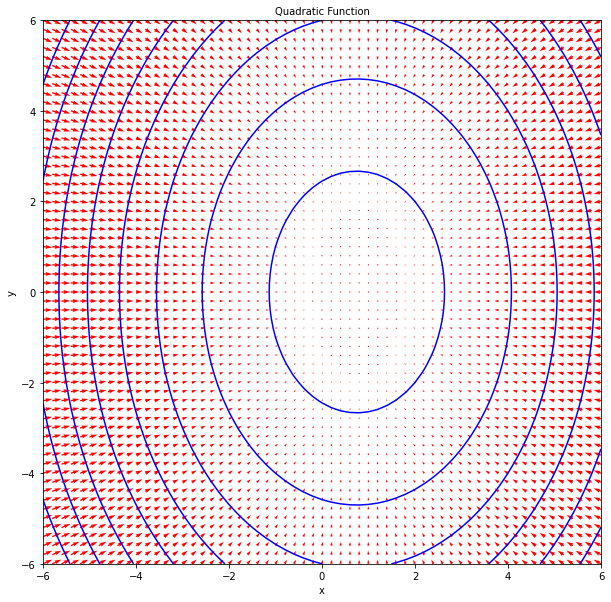

In [4]:
# Plot Quatratic function and it's gradient field

xmin, xmax, ymin, ymax = (-6.0, 6.0, -6.0, 6.0)    
a =  np.zeros((3,3))
a[0,0] = -6.0
a[2,0] = 2.0
a[1,0] = -3.0
a[0,1] = 0.0
a[0,2] = 1.0
fn = QuadF(a)
X, Y = np.meshgrid(np.linspace(xmin, xmax, 61), np.linspace(ymin, ymax, 61))
(F, dFdX, dFdY) = fn.value(X,Y)
dFdZ = dFdX + dFdY
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, -dFdX, -dFdY, -dFdZ, cmap=cmap1)
plt.title('Quadratic Function', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.contour(X,Y,F,10, cmap=cmap2)
plt.show()

In [5]:
class GD(object):
    """
    Gradient Descent to find minimum of a function
    
    Parameters
    ------------
    eta : float 
        Step size (between 0.0 and 1.0)
    
    Attributes    
    ------------
               
        Paramters
        ------------
        x : float, array-like, shpae = [1]
        y : float, array-like, shape = [1]
                        
        Returns
        ------------
        self : object
        
        """
    def __init__(self, eta=0.1):
        self.eta = eta
    def step(self, x, y):
        """
        returns 
        x : float, array-like, shape = [1]
            next value of x
        y : float, array-like, shape = [1]
            next value of y
        f : float, array-like, shape = [1]
            value of f for current value of x,y   
        """
        (f, dzdx, dzdy) = fn.value(x, y)
        x += - self.eta*dzdx
        y += - self.eta*dzdy
        return(x,y,f)
   

In [6]:
# Follow trasjectory for a single value of eta

gd = GD(eta = 0.3)

n_iter = 50
fn = QuadF(a)

x = np.zeros(n_iter+1)
y = np.zeros(n_iter+1)
f = np.zeros(n_iter+1)
delx = np.zeros(n_iter+1)
dely = np.zeros(n_iter+1)
delz = np.zeros(n_iter+1)
delf = np.zeros(n_iter+1)
adelx = np.zeros(n_iter+1)
adely = np.zeros(n_iter+1)
adelf = np.zeros(n_iter+1)

x[0] = -6.0
y[0] = 6.0
delx[0] = 0.0
dely[0] = 0.0
delz[0] = 0.0
delf[0] = 0.0
adelx[0] = 0.0
adely[0] = 0.0
adelf[0] = 0.0

for i in range(n_iter):
    (x[i+1],y[i+1],f[i]) = gd.step(x[i], y[i])
    delx[i+1]=x[i+1]-x[i]
    dely[i+1]=y[i+1]-y[i]
    delz[i+1]=np.sqrt(delx[i+1]**2+dely[i+1]**2)
    delf[i]=f[i]-f[i-1]
    adelx[i+1]=abs(delx[i+1])
    adely[i+1]=abs(dely[i+1])
    adelf[i]=abs(delf[i])
    
#for i in range(0, 5):            
#    print(i,x[i],y[i],f[i],delx[i],dely[i],delz[i],delf[i])
#for i in range(n_iter-5, n_iter):            
#    print(i,x[i],y[i],f[i],delx[i],dely[i],delz[i],delf[i])   

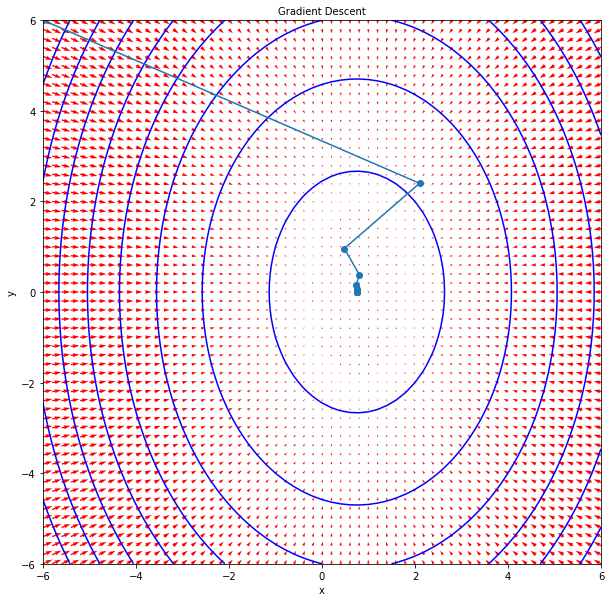

In [7]:
# Plot trajectory of gradient descent

plt.figure(figsize=(10, 10))
plt.xlim(-6.0, 6.0)
plt.ylim(-6.0, 6.0)
plt.quiver(X, Y, -dFdX, -dFdY, -dFdZ, cmap=cmap1)
plt.scatter(x, y, cmap=cmap3)
plt.plot(x, y)
plt.title('Gradient Descent', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.contour(X, Y, F , 10, cmap=cmap2)
plt.show()

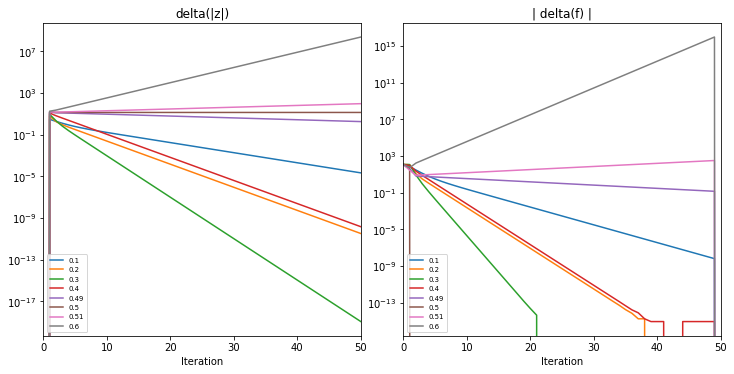

In [8]:
# Plot convergence for various values of eta

fn = QuadF(a)

n_etas = 8
etas = np.zeros(n_etas)
etas[0] = 0.1
etas[1] = 0.2
etas[2] = 0.3
etas[3] = 0.4
etas[4] = 0.49
etas[5] = 0.5
etas[6] = 0.51
etas[7] = 0.6
n_iter = 50

delzk = np.zeros(((n_iter+1),n_etas))
adelfk = np.zeros(((n_iter+1), n_etas))
#delzk.shape = (n_iter+1, n_etas)
#adelfk.shape = (n_iter+1, n_etas)

k = 0
while k < n_etas:
    gd = GD(etas[k])
    
    x = np.zeros(n_iter+1)
    y = np.zeros(n_iter+1)
    f = np.zeros(n_iter+1)
    delx = np.zeros(n_iter+1)
    dely = np.zeros(n_iter+1)
    delf = np.zeros(n_iter+1)
    adelx = np.zeros(n_iter+1)
    adely = np.zeros(n_iter+1)
     
    x[0] = -6.0
    y[0] = -6.0
    delx[0] = 0.0
    dely[0] = 0.0
    delzk[0, k] = 0.0
    delf[0] = 0.0
    adelx[0] = 0.0
    adely[0] = 0.0
    adelfk[0, k] = 0.0

    for i in range(n_iter):
        (x[i+1],y[i+1],f[i]) = gd.step(x[i], y[i])
        delx[i+1]=x[i+1]-x[i]
        dely[i+1]=y[i+1]-y[i]
        delzk[i+1, k]=np.sqrt(delx[i+1]**2+dely[i+1]**2)
        delf[i]=f[i]-f[i-1]
        adelx[i+1]=abs(delx[i+1])
        adely[i+1]=abs(dely[i+1])
        adelfk[i, k]=abs(delf[i])
        
    k += 1

plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

i = 0
while i < n_etas:
    ax[0].semilogy(delzk[:,i], label=etas[i])
    ax[1].semilogy(adelfk[:,i], label=etas[i])
    i +=1
ax[0].set_title('delta(|z|)')
ax[1].set_title('| delta(f) |')
                   
j = 0
while j < 2:
    ax[j].set_xlim([0,n_iter])
    ax[j].set_xlabel('Iteration')  
    ax[j].legend(loc='lower left', fontsize='x-small')
    
    j += 1
                   
plt.tight_layout(pad=0.0)
plt.show()  

In [28]:
# Follow trasjectory for a single value of eta

# Suggested values are 0.1, 0.2, 0.3, 0.4, 0.49, 0.5, 0.51, 0.6

gd = GD(eta = 0.6)

n_iter = 50
fn = QuadF(a)

x = np.zeros(n_iter+1)
y = np.zeros(n_iter+1)
f = np.zeros(n_iter+1)
delx = np.zeros(n_iter+1)
dely = np.zeros(n_iter+1)
delz = np.zeros(n_iter+1)
delf = np.zeros(n_iter+1)
adelx = np.zeros(n_iter+1)
adely = np.zeros(n_iter+1)
adelf = np.zeros(n_iter+1)

x[0] = -0.0
y[0] = -6.0
delx[0] = 0.0
dely[0] = 0.0
delz[0] = 0.0
delf[0] = 0.0
adelx[0] = 0.0
adely[0] = 0.0
adelf[0] = 0.0

for i in range(n_iter):
    (x[i+1],y[i+1],f[i]) = gd.step(x[i], y[i])
    delx[i+1]=x[i+1]-x[i]
    dely[i+1]=y[i+1]-y[i]
    delz[i+1]=np.sqrt(delx[i+1]**2+dely[i+1]**2)
    delf[i]=f[i]-f[i-1]
    adelx[i+1]=abs(delx[i+1])
    adely[i+1]=abs(dely[i+1])
    adelf[i]=abs(delf[i])
    
#for i in range(0, 5):            
#    print(i,x[i],y[i],f[i],delx[i],dely[i],delz[i],delf[i])
#for i in range(n_iter-5, n_iter):            
#    print(i,x[i],y[i],f[i],delx[i],dely[i],delz[i],delf[i])   

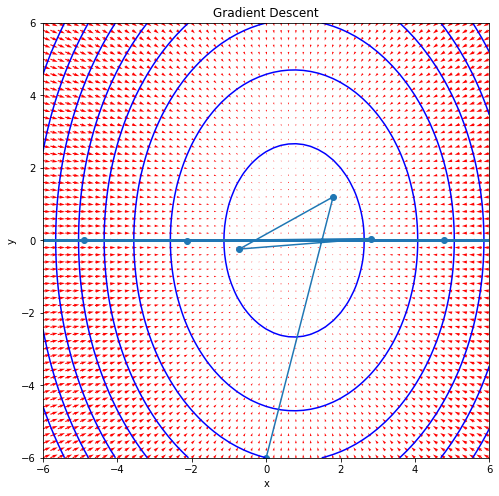

In [29]:
# Plot trajectory of gradient descent

plt.figure(figsize=(8, 8))
plt.xlim(-6.0, 6.0)
plt.ylim(-6.0, 6.0)
plt.quiver(X, Y, -dFdX, -dFdY, -dFdZ, cmap=cmap1)
plt.scatter(x, y, cmap=cmap3)
plt.plot(x, y)
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.contour(X, Y, F , 10, cmap=cmap2)
plt.show()

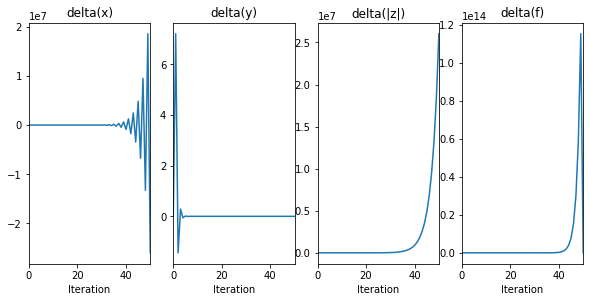

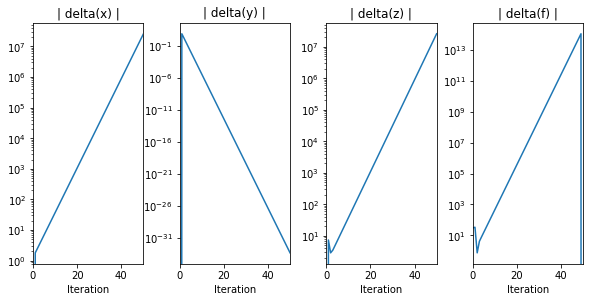

In [30]:
# Plot details for one value of eta

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (8,4))
ax[0].plot(delx)
ax[1].plot(dely)
ax[2].plot(delz)
ax[3].plot(delf)
ax[0].set_title('delta(x)')
ax[1].set_title('delta(y)')
ax[2].set_title('delta(|z|)')
ax[3].set_title('delta(f)')

k = 0
while k < 4:
    ax[k].set_xlim([0,n_iter])
    ax[k].set_xlabel('Iteration')  
    k += 1
plt.tight_layout(pad=0.0)
plt.show()  
plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (8,4))
ax[0].semilogy(adelx)
ax[1].semilogy(adely)
ax[2].semilogy(delz)
ax[3].semilogy(adelf)
ax[0].set_title('| delta(x) |')
ax[1].set_title('| delta(y) |')
ax[2].set_title('| delta(z) |')
ax[3].set_title('| delta(f) |')
k = 0
while k < 4:
    ax[k].set_xlim([0,n_iter])
    ax[k].set_xlabel('Iteration')  
    k += 1
plt.tight_layout(pad=0.0)
plt.show()  